# Project 2 - Ames Housing Data
## Preprocessing and Feature Engineering - Test.csv

![House](images/phil-hearing-house-small.jpg)
<br>Photo by:
https://unsplash.com/photos/IYfp2Ixe9nM?utm_source=unsplash&utm_medium=referral&utm_content=creditShareLink

In [1265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1266]:
houses = pd.read_csv('../datasets/test_clean.csv', keep_default_na=False)

In [1267]:
houses.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM     69.000000      9142   Pave   
1  2718  905108090           90        RL     69.545961      9662   Pave   
2  2414  528218130           60        RL     58.000000     17104   Pave   
3  1989  902207150           30        RM     60.000000      8520   Pave   
4   625  535105100           20        RL     69.545961      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0      NA   
1  None       IR1          Lvl  ...          0            0         0      NA   
2  None       IR1          Lvl  ...          0            0         0      NA   
3  None       Reg          Lvl  ...          0            0         0      NA   
4  None       IR1          Lvl  ...          0          185         0      NA   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0    NA           NA        0       4     2006        WD   
1    NA           NA        0       8     2006        WD   
2    NA           NA        0       9     2006        New  
3    NA           NA        0       7     2007        WD   
4    NA           NA        0       7     2009        WD   

[5 rows x 80 columns]

In [1268]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     878 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            878 non-null    object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

### Find categorical columns to binarize or encode

#### MS Zoning column

In [1269]:
houses['MS Zoning'].value_counts()

RL    674
RM    146
FV     38
RH     13
C       6
I       1
Name: MS Zoning, dtype: int64

In [1270]:
# Convert RL to 7, RM to 6, FV to 5, C to 4, RH to 3, A to 2, and I to 1
houses['MS Zoning'] = houses['MS Zoning'].map({'RL': 7, 'RM': 6, 'FV': 5,'C': 4, 'RH': 3,
                                               'A': 2, 'I': 1})

houses['MS Zoning'].value_counts()

7    674
6    146
5     38
3     13
4      6
1      1
Name: MS Zoning, dtype: int64

#### Street column

In [1271]:
houses['Street'].value_counts()

Pave    873
Grvl      5
Name: Street, dtype: int64

In [1272]:
# Convert Pave to 2, and Grvl to 1.  0 will be used later as some features contain None, or NA
houses['Street'] = houses['Street'].map({'Pave': 2, 'Grvl': 1})

houses['Street'].value_counts()

2    873
1      5
Name: Street, dtype: int64

#### Alley column

In [1273]:
houses['Alley'].value_counts()

None    820
Grvl     35
Pave     23
Name: Alley, dtype: int64

In [1274]:
# Convert Pave to 2, and Grvl to 1, None to  0
houses['Alley'] = houses['Alley'].map({'Pave': 2, 'Grvl': 1, 'None': 0})

houses['Alley'].value_counts()

0    820
1     35
2     23
Name: Alley, dtype: int64

#### Lot Shape

In [1275]:
houses['Lot Shape'].value_counts()

Reg    564
IR1    286
IR2     21
IR3      7
Name: Lot Shape, dtype: int64

In [1276]:
# Convert IR3 to 3, IR2 to 2, and IR1 to 1, Reg to  0
houses['Lot Shape'] = houses['Lot Shape'].map({'IR3': 3, 'IR2': 2, 'IR1': 1, 'Reg': 0})

houses['Lot Shape'].value_counts()

0    564
1    286
2     21
3      7
Name: Lot Shape, dtype: int64

#### Land Contour column

In [1277]:
houses['Land Contour'].value_counts()

Lvl    790
Bnk     36
HLS     35
Low     17
Name: Land Contour, dtype: int64

In [1278]:
# Convert Lvl to 3, HLS to 2, and Bnk to 1, Low to  0
houses['Land Contour'] = houses['Land Contour'].map({'Lvl': 3, 'HLS': 2, 'Bnk': 1, 'Low': 0})

houses['Land Contour'].value_counts()

3    790
1     36
2     35
0     17
Name: Land Contour, dtype: int64

### Utilities is almost entirely AllPub.  Just drop.

In [1279]:
houses['Utilities'].value_counts()

AllPub    877
NoSewr      1
Name: Utilities, dtype: int64

In [1280]:
houses.drop('Utilities', axis=1, inplace=True)

#### Lot Config column

In [1281]:
houses['Lot Config'].value_counts()

Inside     636
Corner     163
CulDSac     49
FR2         25
FR3          5
Name: Lot Config, dtype: int64

In [1282]:
# Convert Inside to 4, Corner to 3, CulDSac to 2, and FR2 to 1, FR3 to 0
houses['Lot Config'] = houses['Lot Config'].map({'Inside': 4,'Corner': 3, 'CulDSac': 2,
                                                 'FR2': 1, 'FR3': 0})

houses['Lot Config'].value_counts()

4    636
3    163
2     49
1     25
0      5
Name: Lot Config, dtype: int64

#### Land Slope column

In [1283]:
houses['Land Slope'].value_counts()

Gtl    835
Mod     37
Sev      6
Name: Land Slope, dtype: int64

In [1284]:
# Convert Gtl to 2, and Mod to 1, Sev to 0
houses['Land Slope'] = houses['Land Slope'].map({'Gtl': 2, 'Mod': 1, 'Sev': 0})

houses['Land Slope'].value_counts()

2    835
1     37
0      6
Name: Land Slope, dtype: int64

#### Neighborhood column
Too many to map each one, so create dummy columns

---
Before dummying, create a new column which shows whether or not a house is near the Iowa State campus.

##### Create NearISU column
One main component of my problem statment will be to compare the prices of houses in neighborhoods near the Iowa State
University's campus.

By using several mapping and real estate web sites, I have identified the following neighborhoods:
>BrkSide (Brookside)<br>
Crawfor (Crawford)<br>
Edwards<br>
IDOTRR (Iowa DOT and Rail Road)<br>
OldTown (Old Town)<br>
SWISU (South & West of Iowa State University)<br>
Sawyer<br>


In [1285]:
near_ISU_hoods = ['BrkSide','Crawfor', 'Edwards', 'IDOTRR', 'OldTown', 'SWISU','Sawyer']

houses[houses['Neighborhood'].isin(near_ISU_hoods)].shape

(270, 79)

522 houses are in the neighborhoods near the Iowa State campus.

In [1286]:
houses['near_ISU'] = [1 if hood in near_ISU_hoods else 0 for hood in houses['Neighborhood']]

Next create dummys for all neighborhoods

In [1287]:
houses['Neighborhood'].value_counts()

NAmes      133
CollgCr     87
OldTown     76
Somerst     52
Edwards     50
Gilbert     49
NridgHt     44
NWAmes      44
Sawyer      40
SawyerW     38
Mitchel     32
Crawfor     32
BrkSide     32
IDOTRR      24
Timber      24
NoRidge     23
ClearCr     17
SWISU       16
MeadowV     13
StoneBr     13
BrDale      11
Veenker      7
NPkVill      6
Blmngtn      6
Greens       5
Blueste      4
Name: Neighborhood, dtype: int64

In [1288]:
houses = pd.get_dummies(houses, columns=['Neighborhood'], drop_first=True)

In [1289]:
#list(houses.columns)

#### Condition 1 column

In [1290]:
houses['Condition 1'].value_counts()

Norm      755
Feedr      55
Artery     22
RRAn       14
PosN       11
PosA        8
RRAe        7
RRNe        3
RRNn        3
Name: Condition 1, dtype: int64

In [1291]:
# Convert Norm to 8,Feedr to 7, Artery to 6, RRAn to 5, PosN to 4, RRAe to 3, PosA to 2,
# and RRNn to 1, RRNe to 0
houses['Condition 1'] = houses['Condition 1'].map({'Norm': 8,'Feedr': 7, 'Artery': 6, 'RRAn': 5,
                                                   'PosN': 4, 'RRAe': 3, 'PosA': 2, 'RRNn': 1,
                                                  'RRNe': 0})

houses['Condition 1'].value_counts()

8    755
7     55
6     22
5     14
4     11
2      8
3      7
1      3
0      3
Name: Condition 1, dtype: int64

#### Condition 2 has same categories as Condition 1

In [1292]:
houses['Condition 2'].value_counts()

Norm     875
Feedr      2
PosA       1
Name: Condition 2, dtype: int64

In [1293]:
# Convert Norm to 8,Feedr to 7, Artery to 6, RRAn to 5, PosN to 4, RRAe to 3, PosA to 2,
# and RRNn to 1, RRNe to 0
houses['Condition 2'] = houses['Condition 2'].map({'Norm': 8,'Feedr': 7, 'Artery': 6, 'RRAn': 5,
                                                   'PosN': 4, 'RRAe': 3, 'PosA': 2, 'RRNn': 1,
                                                  'RRNe': 0})

houses['Condition 2'].value_counts()

8    875
7      2
2      1
Name: Condition 2, dtype: int64

#### Bldg Type column

In [1294]:
houses['Bldg Type'].value_counts()

1Fam      724
TwnhsE     72
Duplex     34
Twnhs      32
2fmCon     16
Name: Bldg Type, dtype: int64

In [1295]:
# Convert 1Fam to 4, TwnhsE to 3, Duplex to 2, and Twnhs to 1, 2fmCon to 0
houses['Bldg Type'] = houses['Bldg Type'].map({'1Fam': 4, 'TwnhsE': 3, 'Duplex': 2, 'Twnhs': 1,
                                                  '2fmCon': 0})

houses['Bldg Type'].value_counts()

4    724
3     72
2     34
1     32
0     16
Name: Bldg Type, dtype: int64

#### House Style column

For now categorize, but later will create a new feature called **floors** to show one or two stories in a house.

Basement information is contained in other columns.

In [1296]:
# Save this for a later histogram
house_styles = houses['House Style']

houses['House Style'].value_counts()

1Story    422
2Story    274
1.5Fin     96
SLvl       34
SFoyer     33
2.5Unf     10
1.5Unf      7
2.5Fin      2
Name: House Style, dtype: int64

In [1297]:
# Convert 1Story to 7, 2Story to 6, 1.5Fin to 5, Slvl to 4, SFoyer to 3, 2.5Unf to 2,
# and 1.5Unf to 1, 2.5Fin to 0
houses['House Style'] = houses['House Style'].map({'1Story': 7, '2Story': 6, '1.5Fin': 5,
                                                   'SLvl': 4, 'SFoyer': 3, '2.5Unf': 2, '1.5Unf': 1,
                                                  '2.5Fin': 0})

houses['House Style'].value_counts()

7    422
6    274
5     96
4     34
3     33
2     10
1      7
0      2
Name: House Style, dtype: int64

#### Roof Style

In [1298]:
houses['Roof Style'].value_counts()

Gable      702
Hip        153
Gambrel     10
Flat         7
Mansard      4
Shed         2
Name: Roof Style, dtype: int64

In [1299]:
# Convert Gable to 5, Hip to 4, Flat to 3, Gambrel to 2, and Mansard to 1, Shed to 0
houses['Roof Style'] = houses['Roof Style'].map({'Gable': 5, 'Hip': 4, 'Flat': 3,
                                                 'Gambrel': 2, 'Mansard': 1, 'Shed': 0})

houses['Roof Style'].value_counts()

5    702
4    153
2     10
3      7
1      4
0      2
Name: Roof Style, dtype: int64

#### Roof Matl column

In [1300]:
houses['Roof Matl'].value_counts()

CompShg    861
Tar&Grv      8
WdShake      5
WdShngl      2
Metal        1
Roll         1
Name: Roof Matl, dtype: int64

In [1301]:
houses['Roof Matl'] = houses['Roof Matl'].map({'ClyTile':7, 'Metal':6, 'Roll':5,'CompShg': 4, 'Tar&Grv': 3,
                                                 'WdShake': 2, 'WdShngl': 1, 'Membran': 0})

houses['Roof Matl'].value_counts()

4    861
3      8
2      5
1      2
6      1
5      1
Name: Roof Matl, dtype: int64

#### Exterior 1st column

In [1302]:
houses['Exterior 1st'].value_counts()

VinylSd    302
Wd Sdng    144
HdBoard    142
MetalSd    119
Plywood     69
CemntBd     35
BrkFace     24
Stucco      16
AsbShng     11
WdShing     11
BrkComm      3
PreCast      1
AsphShn      1
Name: Exterior 1st, dtype: int64

In [1303]:

ext1_dict = {'VinylSd':12, 'Wd Sdng':11,'HdBoard':10,'MetalSd':9,
            'Plywood':8,'CemntBd':7, 'BrkFace':6, 'Stucco':5, 'AsbShng': 4,
            'WdShing': 3,'BrkComm': 2, 'PreCast': 1, 'AsphShn': 0}

houses['Exterior 1st'] = houses['Exterior 1st'].map(ext1_dict)

houses['Exterior 1st'].value_counts()

12    302
11    144
10    142
9     119
8      69
7      35
6      24
5      16
4      11
3      11
2       3
1       1
0       1
Name: Exterior 1st, dtype: int64

#### Exterior 2nd column

In [1304]:
houses['Exterior 2nd'].value_counts()

VinylSd    294
Wd Sdng    135
HdBoard    131
MetalSd    123
Plywood     89
CmentBd     35
Wd Shng     18
Stucco      17
BrkFace     13
AsbShng     10
Brk Cmn      5
ImStucc      4
Other        1
PreCast      1
AsphShn      1
CBlock       1
Name: Exterior 2nd, dtype: int64

In [1305]:

ext2_dict = {'VinylSd':15, 'Wd Sdng':14, 'HdBoard':13,'MetalSd':12, 'Plywood':11,
            'CmentBd':10, 'Wd Shng':9, 'Stucco':8, 'BrkFace': 7,'AsbShng': 6,
             'Brk Cmn': 5, 'ImStucc': 4, 'Other':3, 'PreCast':2, 'AsphShn': 1 , 'CBlock': 0}

houses['Exterior 2nd'] = houses['Exterior 2nd'].map(ext2_dict)

houses['Exterior 2nd'].value_counts()

15    294
14    135
13    131
12    123
11     89
10     35
9      18
8      17
7      13
6      10
5       5
4       4
3       1
2       1
1       1
0       1
Name: Exterior 2nd, dtype: int64

#### Mas Vnr Type column - Masonry veneer type

In [1306]:
houses['Mas Vnr Type'].value_counts()

None       535
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64

In [1307]:
houses['Mas Vnr Type'] = houses['Mas Vnr Type'].map({'None': 4, 'BrkFace': 3, 'Stone': 2,
                                                  'BrkCmn': 1, 'CBlock':0})

houses['Mas Vnr Type'].value_counts()

4    535
3    250
2     80
1     12
0      1
Name: Mas Vnr Type, dtype: int64

#### Exter Qual column - Exterior quality

In [1308]:
houses['Exter Qual'].value_counts()

TA    552
Gd    292
Ex     25
Fa      9
Name: Exter Qual, dtype: int64

In [1309]:
quality_map = {'Ex':5,'Gd': 4,'TA': 3, 'Fa': 2, 'Po': 1,'NA': 0}

houses['Exter Qual'] = houses['Exter Qual'].map(quality_map)

houses['Exter Qual'].value_counts()

3    552
4    292
5     25
2      9
Name: Exter Qual, dtype: int64

#### Exter Cond column - exterior condition

In [1310]:
houses['Exter Cond'].value_counts()

TA    770
Gd     84
Fa     18
Ex      5
Po      1
Name: Exter Cond, dtype: int64

In [1311]:
houses['Exter Cond'] = houses['Exter Cond'].map(quality_map)

houses['Exter Cond'].value_counts()

3    770
4     84
2     18
5      5
1      1
Name: Exter Cond, dtype: int64

#### Foundation column

In [1312]:
houses['Foundation'].value_counts()

PConc     383
CBlock    381
BrkTil     90
Slab       15
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [1313]:
houses['Foundation'] = houses['Foundation'].map({'PConc':5, 'CBlock': 4, 'BrkTil': 3,
                                                 'Slab': 2, 'Stone': 1, 'Wood': 0})

houses['Foundation'].value_counts()

5    383
4    381
3     90
2     15
1      6
0      3
Name: Foundation, dtype: int64

#### Bsmt Qual column - Basement height

In [1314]:
houses['Bsmt Qual'].value_counts()

TA    396
Gd    355
Ex     73
Fa     28
NA     25
Po      1
Name: Bsmt Qual, dtype: int64

In [1315]:
houses['Bsmt Qual'] = houses['Bsmt Qual'].map(quality_map)

houses['Bsmt Qual'].value_counts()

3    396
4    355
5     73
2     28
0     25
1      1
Name: Bsmt Qual, dtype: int64

#### Bsmt Cond column - Basement condition

In [1316]:
houses['Bsmt Cond'].value_counts()

TA    781
Fa     39
Gd     33
NA     25
Name: Bsmt Cond, dtype: int64

In [1317]:
houses['Bsmt Cond'] = houses['Bsmt Cond'].map(quality_map)

houses['Bsmt Cond'].value_counts()

3    781
2     39
4     33
0     25
Name: Bsmt Cond, dtype: int64

#### Bsmt Exposure - walkout or garden level walls

In [1318]:
houses['Bsmt Exposure'].value_counts()

No    567
Av    130
Gd     80
Mn     76
NA     25
Name: Bsmt Exposure, dtype: int64

In [1319]:
houses['Bsmt Exposure'] = houses['Bsmt Exposure'].map({'No': 4, 'Av': 3, 'Gd': 2, 'Mn': 1, 'NA':0})

houses['Bsmt Exposure'].value_counts()

4    567
3    130
2     80
1     76
0     25
Name: Bsmt Exposure, dtype: int64

#### BsmtFin Type 1 column

In [1320]:
houses['BsmtFin Type 1'].value_counts() 

Unf    248
GLQ    243
ALQ    136
Rec    105
BLQ     69
LwQ     52
NA      25
Name: BsmtFin Type 1, dtype: int64

In [1321]:
basement_map = {'GLQ':6,'Unf': 5,'ALQ': 4, 'BLQ': 3, 'Rec': 2,'LwQ': 1, 'NA':0}

houses['BsmtFin Type 1'] = houses['BsmtFin Type 1'].map(basement_map)

houses['BsmtFin Type 1'].value_counts() 

5    248
6    243
4    136
2    105
3     69
1     52
0     25
Name: BsmtFin Type 1, dtype: int64

#### BsmtFin Type 2 column

In [1322]:
houses['BsmtFin Type 2'].value_counts() 

Unf    749
LwQ     29
Rec     26
NA      25
BLQ     20
ALQ     18
GLQ     11
Name: BsmtFin Type 2, dtype: int64

In [1323]:
houses['BsmtFin Type 2'] = houses['BsmtFin Type 2'].map(basement_map)
houses['BsmtFin Type 2'].value_counts() 

5    749
1     29
2     26
0     25
3     20
4     18
6     11
Name: BsmtFin Type 2, dtype: int64

#### Heating column

In [1324]:
houses['Heating'].value_counts() 

GasA     866
GasW       7
Grav       4
Floor      1
Name: Heating, dtype: int64

In [1325]:
houses['Heating'] = houses['Heating'].map({'Floor':5, 'GasA':4, 'GasW': 3, 'Wall': 2, 'Grav': 1, 'OthW': 0})
houses['Heating'].value_counts() 

4    866
3      7
1      4
5      1
Name: Heating, dtype: int64

#### Heating QC column - Heating quality and condition

In [1326]:
houses['Heating QC'].value_counts() 

Ex    429
TA    267
Gd    157
Fa     25
Name: Heating QC, dtype: int64

In [1327]:
houses['Heating QC'] = houses['Heating QC'].map(quality_map)
houses['Heating QC'].value_counts() 

5    429
3    267
4    157
2     25
Name: Heating QC, dtype: int64

#### Central Air

In [1328]:
houses['Central Air'].value_counts() 

Y    823
N     55
Name: Central Air, dtype: int64

In [1329]:
houses['Central Air'] = houses['Central Air'].map({'Y': 1, 'N': 0})
houses['Central Air'].value_counts() 

1    823
0     55
Name: Central Air, dtype: int64

#### Electrical

In [1330]:
houses['Electrical'].value_counts() 

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
           1
Name: Electrical, dtype: int64

One row has an empty string, just set to the same as SBrkr since it's the most commmon

In [1331]:
houses['Electrical'] = houses['Electrical'].map({'':4, 'SBrkr':4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0})

houses['Electrical'].value_counts() 

4    814
3     48
2     15
1      1
Name: Electrical, dtype: int64

#### Kitchen Qual

In [1332]:
houses['Kitchen Qual'].value_counts() 

TA    447
Gd    354
Ex     53
Fa     23
Po      1
Name: Kitchen Qual, dtype: int64

In [1333]:
houses['Kitchen Qual'] = houses['Kitchen Qual'].map(quality_map)
houses['Kitchen Qual'].value_counts() 

3    447
4    354
5     53
2     23
1      1
Name: Kitchen Qual, dtype: int64

#### Functional column

In [1334]:
houses['Functional'].value_counts() 

Typ     812
Min2     28
Min1     23
Maj1      7
Mod       6
Maj2      2
Name: Functional, dtype: int64

In [1335]:
houses['Functional'] = houses['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod': 4, 'Maj1': 3,
                                                 'Maj2': 2, 'Sal': 1, 'Sev': 0})

houses['Functional'].value_counts() 

7    812
5     28
6     23
3      7
4      6
2      2
Name: Functional, dtype: int64

#### Fireplace Qu - quality

In [1336]:
houses['Fireplace Qu'].value_counts() 

NA    422
Gd    220
TA    193
Fa     16
Po     15
Ex     12
Name: Fireplace Qu, dtype: int64

In [1337]:
houses['Fireplace Qu'] = houses['Fireplace Qu'].map(quality_map)
houses['Fireplace Qu'].value_counts() 

0    422
4    220
3    193
2     16
1     15
5     12
Name: Fireplace Qu, dtype: int64

#### Garage Type

In [1338]:
houses['Garage Type'].value_counts() 

Attchd     518
Detchd     246
BuiltIn     53
NA          44
Basment      9
CarPort      4
2Types       4
Name: Garage Type, dtype: int64

In [1339]:
houses['Garage Type'] = houses['Garage Type'].map({'Attchd':6, 'Detchd': 5, 'BuiltIn': 4, 'NA':3,
                                                 'Basment': 2, '2Types': 1, 'CarPort': 0})

houses['Garage Type'].value_counts() 

6    518
5    246
4     53
3     44
2      9
1      4
0      4
Name: Garage Type, dtype: int64

#### Garage Finish

In [1340]:
houses['Garage Finish'].value_counts() 

Unf    382
RFn    233
Fin    218
NA      45
Name: Garage Finish, dtype: int64

In [1341]:
houses['Garage Finish'] = houses['Garage Finish'].map({'Unf': 3, 'RFn': 2, 'Fin': 1, 'NA':0})
houses['Garage Finish'].value_counts() 

3    382
2    233
1    218
0     45
Name: Garage Finish, dtype: int64

#### Garage Qual column

In [1342]:
houses['Garage Qual'].value_counts() 

TA    782
NA     45
Fa     42
Gd      6
Po      3
Name: Garage Qual, dtype: int64

In [1343]:
houses['Garage Qual'] = houses['Garage Qual'].map(quality_map)
houses['Garage Qual'].value_counts() 

3    782
0     45
2     42
4      6
1      3
Name: Garage Qual, dtype: int64

#### Garage Cond - condition

In [1344]:
houses['Garage Cond'].value_counts() 

TA    796
NA     45
Fa     27
Po      6
Gd      3
Ex      1
Name: Garage Cond, dtype: int64

In [1345]:
houses['Garage Cond'] = houses['Garage Cond'].map(quality_map)
houses['Garage Cond'].value_counts() 

3    796
0     45
2     27
1      6
4      3
5      1
Name: Garage Cond, dtype: int64

#### Paved Drive column

In [1346]:
houses['Paved Drive'].value_counts() 

Y    790
N     65
P     23
Name: Paved Drive, dtype: int64

In [1347]:
houses['Paved Drive'] = houses['Paved Drive'].map({'Y': 2, 'N': 1, 'P': 0})
houses['Paved Drive'].value_counts()

2    790
1     65
0     23
Name: Paved Drive, dtype: int64

#### Pool QC

In [1348]:
houses['Pool QC'].value_counts() 

NA    874
Ex      3
TA      1
Name: Pool QC, dtype: int64

In [1349]:
houses['Pool QC'] = houses['Pool QC'].map(quality_map)
houses['Pool QC'].value_counts() 

0    874
5      3
3      1
Name: Pool QC, dtype: int64

#### Fence column

In [1350]:
houses['Fence'].value_counts() 

NA       706
MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: Fence, dtype: int64

In [1351]:
houses['Fence'] = houses['Fence'].map({'NA':4, 'MnPrv':3, 'GdPrv': 2, 'GdWo': 1, 'MnWw': 0})
houses['Fence'].value_counts() 

4    706
3    103
2     35
1     32
0      2
Name: Fence, dtype: int64

#### Misc Feature

In [1352]:
houses['Misc Feature'].value_counts() 

NA      837
Shed     39
Gar2      1
Othr      1
Name: Misc Feature, dtype: int64

In [1353]:
houses['Misc Feature'] = houses['Misc Feature'].map({'NA':4, 'Shed':3, 'Gar2': 2, 'Othr': 1, 'TenC': 0})
houses['Misc Feature'].value_counts() 

4    837
3     39
2      1
1      1
Name: Misc Feature, dtype: int64

#### Sale Type

In [1354]:
houses['Sale Type'].value_counts() 

WD       755
New       78
COD       24
ConLD      9
Oth        3
ConLw      3
ConLI      2
CWD        2
VWD        1
Con        1
Name: Sale Type, dtype: int64

In [1355]:
houses['Sale Type'] = houses['Sale Type'].str.strip().map({'VWD':9,'WD':8, 'New':7,'COD':6, 'ConLD':5, 'CWD': 4,
                                               'ConLI': 3,'ConLw': 2, 'Oth': 1, 'Con': 0})

houses['Sale Type'].value_counts() 

8    755
7     78
6     24
5      9
2      3
1      3
4      2
3      2
9      1
0      1
Name: Sale Type, dtype: int64

---
### Create floors feature
The dataset lacks a clear way to model how many floors a house contains.<br>
The House Style contained the following categories:<br>
>        1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

which was difficult to translate.


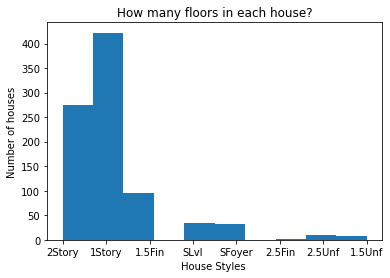

In [1356]:
ax = house_styles.hist()
ax.grid(False)
ax.set(xlabel="House Styles ", ylabel = "Number of houses", title="How many floors in each house?");

A cleaner way to present this would be to create a **floors** column, that would contain 1 or 2 depending on the 1st Flr SF and 2nd Flr SF column.

All houses have a non-zero amount for 1st Flr SF (First Floor square feet), however not every house has a value the 2nd Flr SF (Second floor square feet).

If a house has a non-zero amount for 2nd Flr SF, then it's floors value is set to 2.

There should be 857 houses with floors set to 2

In [1357]:
houses.loc[houses['2nd Flr SF'] >0].shape

(391, 104)

In [1358]:
houses['floors'] = [2 if second_floor > 0 else 1 for second_floor in houses['2nd Flr SF']]
houses['floors'].value_counts()

1    487
2    391
Name: floors, dtype: int64

#### Create bathrooms 

Bathroom information is captured in four different columns:
>Bsmt Full Bath (Discrete): Basement full bathrooms<br>
Bsmt Half Bath (Discrete): Basement half bathrooms<br>
Full Bath (Discrete): Full bathrooms above grade<br>
Half Bath (Discrete): Half baths above grade

Combine all four into one simple feature called **bathrooms**



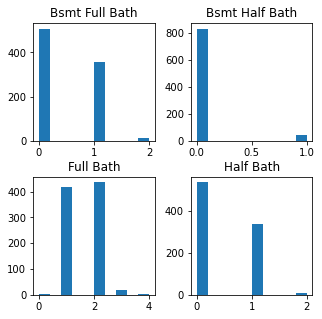

In [1359]:
bath_columns = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']

ax = houses[bath_columns].hist( figsize=(5, 5), grid=False )

In [1360]:
houses['bathrooms'] = houses[bath_columns].sum(axis=1)

#hat tip to this post on stackoverflow:
#https://stackoverflow.com/questions/25748683/pandas-sum-dataframe-rows-for-given-columns

### Save cleaned data to csv

In [1361]:
houses.to_csv('../datasets/test_processed.csv', index=False)